<a href="https://colab.research.google.com/github/GitMishka/1/blob/main/survery1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
from google.colab import files

df_names = ["paylocity_df", "q1_df", "q2_df"]
df_dict = {}

for df_name in df_names:
    print(f"Uploading file for {df_name}")
    uploaded = files.upload()

    if len(uploaded) != 1:
        print("Please upload only one file at a time.")
        break

    uploaded_file = list(uploaded.keys())[0]
    df_dict[df_name] = pd.read_csv(uploaded_file)

paylocity_df = df_dict.get("paylocity_df")
q1_df = df_dict.get("q1_df")
q2_df = df_dict.get("q2_df")


Uploading file for paylocity_df


Saving paylocity.csv to paylocity.csv
Uploading file for q1_df


Saving Qualtrix1.csv to Qualtrix1.csv
Uploading file for q2_df


Saving Qualtrix2.csv to Qualtrix2.csv


In [ ]:
word_cloud_df = q1_df[['Contact Fields - External Reference', 'Q2 - What can we do better?', 'Embedded Data - Job Title - Current', 'Embedded Data - Community']]

In [ ]:
q1_df['Survey Metadata - End Date (+00:00 GMT)'] = pd.to_datetime(q1_df['Survey Metadata - End Date (+00:00 GMT)'])

# Determine the most recent month
latest_month = q1_df['Survey Metadata - End Date (+00:00 GMT)'].dt.to_period('M').max()
previous_month = q1_df['Survey Metadata - End Date (+00:00 GMT)'].dt.to_period('M').max()-1

# Filter the data to only include rows from the most recent month
latest_data = q1_df[q1_df['Survey Metadata - End Date (+00:00 GMT)'].dt.to_period('M') == latest_month]
previous_month = q1_df[q1_df['Survey Metadata - End Date (+00:00 GMT)'].dt.to_period('M') == previous_month]

previous_month

,Survey Metadata - Start Date (+00:00 GMT),Survey Metadata - End Date (+00:00 GMT),Survey Metadata - Response Type,Survey Metadata - IP Address,Survey Metadata - Progress,Survey Metadata - Duration (in seconds),Survey Metadata - Finished,Survey Metadata - Recorded Date (+00:00 GMT),Contact Fields - Recipient Last Name,Contact Fields - Recipient First Name,...,Embedded Data - VOLUNTEER,Embedded Data - WorkPhone,Embedded Data - Zip,Embedded Data - Zip Code,_cachedDate (+00:00 GMT),_recordId,_recordedDate (+00:00 GMT),_sourceId,_sourceMapId,_sourceType
510,7/26/2023 4:50,2023-07-26 04:50:00,IP Address,73.88.230.206,50,8,False,8/2/2023 4:50,Partin,Tonya,...,NaN,NaN,37205.0,37398,9/11/2023 17:16,R_Dl5haGQPuy0yluV,8/2/2023 4:50,SV_4IoDDTwTbHkdBJk,1A0B997872217727C4DDEAB18053BFAE,survey
511,7/20/2023 14:06,2023-07-21 23:10:00,IP Address,162.247.216.12,50,119039,False,7/28/2023 23:10,Fulton,Sharon,...,NaN,NaN,NaN,30701,9/11/2023 17:16,R_2432JRP7b7poMsJ,7/28/2023 23:10,SV_4IoDDTwTbHkdBJk,1A0B997872217727C4DDEAB18053BFAE,survey
512,7/20/2023 13:58,2023-07-21 00:46:00,IP Address,162.247.216.12,50,38857,False,7/28/2023 0:46,Cunningham,Lara,...,NaN,NaN,NaN,37421,9/11/2023 17:16,R_1jx2XAtbCsLHkqE,7/28/2023 0:46,SV_4IoDDTwTbHkdBJk,1A0B997872217727C4DDEAB18053BFAE,survey
513,7/20/2023 14:07,2023-07-20 20:20:00,IP Address,162.247.216.12,50,22426,False,7/27/2023 20:20,Rollings,Stephanie,...,NaN,NaN,NaN,37415,9/11/2023 17:16,R_2QDszFapsC5WoHB,7/27/2023 20:20,SV_4IoDDTwTbHkdBJk,1A0B997872217727C4DDEAB18053BFAE,survey
514,7/20/2023 16:25,2023-07-20 16:25:00,IP Address,174.199.224.155,50,15,False,7/27/2023 16:25,Jones,Haley,...,NaN,NaN,NaN,30103,9/11/2023 17:16,R_3lYOyKrcF6iHpZf,7/27/2023 16:25,SV_4IoDDTwTbHkdBJk,1A0B997872217727C4DDEAB18053BFAE,survey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,7/17/2023 13:16,2023-07-17 13:16:00,IP Address,162.247.216.12,100,47,True,7/17/2023 13:16,Tagaloa-Jackson,Natalie,...,NaN,NaN,NaN,40505,9/11/2023 17:16,R_2qgSzkiS23WAynX,7/17/2023 13:16,SV_4IoDDTwTbHkdBJk,1A0B997872217727C4DDEAB18053BFAE,survey
1046,7/17/2023 13:16,2023-07-17 13:16:00,IP Address,162.247.216.12,100,26,True,7/17/2023 13:16,Collins,Ramoni,...,NaN,NaN,NaN,40216,9/11/2023 17:16,R_3jYYJu1NJcBI7QG,7/17/2023 13:16,SV_4IoDDTwTbHkdBJk,1A0B997872217727C4DDEAB18053BFAE,survey
1047,7/7/2023 17:30,2023-07-07 17:31:00,IP Address,184.174.132.136,100,34,True,7/7/2023 17:31,Franks,Melinda,...,NaN,NaN,NaN,30736,9/11/2023 17:16,R_1BPNqfxwK3wAhqY,7/7/2023 17:31,SV_4IoDDTwTbHkdBJk,1A0B997872217727C4DDEAB18053BFAE,survey
1048,7/5/2023 15:23,2023-07-05 15:24:00,IP Address,166.137.19.39,100,21,True,7/5/2023 15:24,Moses,Donna,...,NaN,NaN,NaN,30755,9/11/2023 17:16,R_w1RgqJLCVyUqarv,7/5/2023 15:24,SV_4IoDDTwTbHkdBJk,1A0B997872217727C4DDEAB18053BFAE,survey


In [ ]:
# Merge the dataframes on the specified columns
paylocity_df.rename(columns={'CostCenter1': 'LocCode'}, inplace=True)
merged_df = q2_df.merge(paylocity_df[['EmployeeID', 'LocCode']],
                        left_on='External Data Reference',
                        right_on='EmployeeID',
                        how='left')

# Drop the 'EmployeeID' column after merging as it's redundant
merged_df.drop('EmployeeID', axis=1, inplace=True)

print()
# Now, group by "External Data Reference" and "CostCenter2"
grouped = merged_df.groupby(['External Data Reference', 'LocCode']).size().reset_index(name='count')




In [ ]:


# Group by community and then aggregate to get the sum
sum_counts_by_community = merged_df.groupby('LocCode').size().reset_index(name='sum_counts')

print(sum_counts_by_community)


   LocCode  sum_counts
0     ATHS          34
1     BRWD          60
2     CALH          55
3     CGDL          36
4     CHTL          61
5     CHTT          54
6     CLIN          34
7     COLM          42
8     DANV          89
9     EHAM          63
10    FKTL          36
11    FKTN          48
12    FRKL          38
13    FRKT          37
14    FRLN          40
15    GRNB          45
16    GRNV          43
17    HARD          52
18    HIXN          56
19    HPPY           4
20    KNOX          45
21    KNXL          60
22    LENC          44
23    LENL          31
24    LEXE          60
25    LEXL          47
26    LEXN          58
27    LVLL          38
28    LVLM          48
29    POWL          47
30    PWLL          43
31    RICH          33
32    RUSL          34
33    RUSS          37
34    SPRH          51
35    SPRL          44
36    TULA          39
37    TUSC          83


In [ ]:
q1_df

,Survey Metadata - Start Date (+00:00 GMT),Survey Metadata - End Date (+00:00 GMT),Survey Metadata - Response Type,Survey Metadata - IP Address,Survey Metadata - Progress,Survey Metadata - Duration (in seconds),Survey Metadata - Finished,Survey Metadata - Recorded Date (+00:00 GMT),Contact Fields - Recipient Last Name,Contact Fields - Recipient First Name,...,Embedded Data - VOLUNTEER,Embedded Data - WorkPhone,Embedded Data - Zip,Embedded Data - Zip Code,_cachedDate (+00:00 GMT),_recordId,_recordedDate (+00:00 GMT),_sourceId,_sourceMapId,_sourceType
0,8/24/2023 1:53,2023-08-24 01:53:00,IP Address,173.186.74.109,50,15,False,8/31/2023 1:53,Hatton,Judy,...,NaN,NaN,NaN,30720,9/11/2023 17:16,R_2RazxFv15eVCFx8,8/31/2023 1:53,SV_4IoDDTwTbHkdBJk,1A0B997872217727C4DDEAB18053BFAE,survey
1,8/29/2023 12:29,2023-08-29 12:29:00,IP Address,69.12.38.72,100,10,True,8/29/2023 12:29,Kelmanson,Victoria,...,NaN,NaN,NaN,40065,9/11/2023 17:16,R_3iP7eEQB7DPHtx5,8/29/2023 12:29,SV_4IoDDTwTbHkdBJk,1A0B997872217727C4DDEAB18053BFAE,survey
2,8/29/2023 0:26,2023-08-29 00:26:00,IP Address,172.59.81.214,100,17,True,8/29/2023 0:26,Hayden,Carolyn,...,NaN,NaN,NaN,40218,9/11/2023 17:16,R_2ToRd8n7EtodXUy,8/29/2023 0:26,SV_4IoDDTwTbHkdBJk,1A0B997872217727C4DDEAB18053BFAE,survey
3,8/25/2023 14:47,2023-08-27 11:07:00,IP Address,162.247.216.12,100,159654,True,8/27/2023 11:07,Cruse,Karrie,...,NaN,NaN,NaN,37924,9/11/2023 17:16,R_x5tXnJ2Lq1Fbnt7,8/27/2023 11:07,SV_4IoDDTwTbHkdBJk,1A0B997872217727C4DDEAB18053BFAE,survey
4,8/25/2023 14:47,2023-08-26 20:10:00,IP Address,162.247.216.12,100,105806,True,8/26/2023 20:10,McCoy,Ken,...,NaN,NaN,NaN,30736,9/11/2023 17:16,R_2XprBfHl8q3SfHf,8/26/2023 20:10,SV_4IoDDTwTbHkdBJk,1A0B997872217727C4DDEAB18053BFAE,survey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,7/17/2023 13:16,2023-07-17 13:16:00,IP Address,162.247.216.12,100,47,True,7/17/2023 13:16,Tagaloa-Jackson,Natalie,...,NaN,NaN,NaN,40505,9/11/2023 17:16,R_2qgSzkiS23WAynX,7/17/2023 13:16,SV_4IoDDTwTbHkdBJk,1A0B997872217727C4DDEAB18053BFAE,survey
1046,7/17/2023 13:16,2023-07-17 13:16:00,IP Address,162.247.216.12,100,26,True,7/17/2023 13:16,Collins,Ramoni,...,NaN,NaN,NaN,40216,9/11/2023 17:16,R_3jYYJu1NJcBI7QG,7/17/2023 13:16,SV_4IoDDTwTbHkdBJk,1A0B997872217727C4DDEAB18053BFAE,survey
1047,7/7/2023 17:30,2023-07-07 17:31:00,IP Address,184.174.132.136,100,34,True,7/7/2023 17:31,Franks,Melinda,...,NaN,NaN,NaN,30736,9/11/2023 17:16,R_1BPNqfxwK3wAhqY,7/7/2023 17:31,SV_4IoDDTwTbHkdBJk,1A0B997872217727C4DDEAB18053BFAE,survey
1048,7/5/2023 15:23,2023-07-05 15:24:00,IP Address,166.137.19.39,100,21,True,7/5/2023 15:24,Moses,Donna,...,NaN,NaN,NaN,30755,9/11/2023 17:16,R_w1RgqJLCVyUqarv,7/5/2023 15:24,SV_4IoDDTwTbHkdBJk,1A0B997872217727C4DDEAB18053BFAE,survey


In [ ]:
# Duplicate the column
q1_df['LocCode'] = q1_df['Embedded Data - Community']

# Now, group by 'LocCode' and aggregate
aggregated = q1_df.groupby('LocCode').agg({
    'Q1 - On a scale of 0-10 how satisfied are you working for Morning Pointe?': 'mean',
    'Q2 - What can we do better?': 'count',
    'Embedded Data - Community': 'size'
}).reset_index()

# Round the Q1 average score to 1 decimal place
aggregated['Q1 - On a scale of 0-10 how satisfied are you working for Morning Pointe?'] = aggregated['Q1 - On a scale of 0-10 how satisfied are you working for Morning Pointe?'].round(1)

# Rename the columns for clarity
aggregated.columns = ['LocCode', 'Average Q1 Score', 'Count of Q2 Entries', 'Count of Community Entries']

print(aggregated)


   LocCode  Average Q1 Score  Count of Q2 Entries  Count of Community Entries
0     ATHS               9.0                    0                          25
1     BRWD               6.9                    9                          36
2     CALH               6.8                    7                          37
3     CGDL               7.4                    2                          15
4     CHTL               7.1                    6                          34
5     CHTT               8.7                    2                          41
6     CLIN               6.6                    2                          21
7     COLM               8.6                    1                          23
8     DANV               6.7                    7                          45
9     EHAM               5.9                    7                          36
10    FKTL               7.7                    2                          27
11    FKTN               6.7                    5               

In [ ]:

# # Group by 'Embedded Data - Community' and aggregate
# aggregated = q1_df.groupby('Embedded Data - Community').agg({
#     'Q1 - On a scale of 0-10 how satisfied are you working for Morning Pointe?': 'mean',
#     'Q2 - What can we do better?': 'count'
# }).reset_index()

# # Round the Q1 average score to 1 decimal place
# aggregated['Q1 - On a scale of 0-10 how satisfied are you working for Morning Pointe?'] = aggregated['Q1 - On a scale of 0-10 how satisfied are you working for Morning Pointe?'].round(1)

# # Rename the columns for clarity
# aggregated.columns = ['Embedded Data - Community', 'Average Q1 Score', 'Count of Q2 Entries']

# print(aggregated)


In [ ]:
# Assuming the 'sum_counts_by_community' DataFrame has a column named 'community' for the community names.
combined = pd.merge(aggregated, sum_counts_by_community, left_on='LocCode', right_on='LocCode', how='left')

print(combined)


   LocCode  Average Q1 Score  Count of Q2 Entries  Count of Community Entries  \
0     ATHS               9.0                    0                          25   
1     BRWD               6.9                    9                          36   
2     CALH               6.8                    7                          37   
3     CGDL               7.4                    2                          15   
4     CHTL               7.1                    6                          34   
5     CHTT               8.7                    2                          41   
6     CLIN               6.6                    2                          21   
7     COLM               8.6                    1                          23   
8     DANV               6.7                    7                          45   
9     EHAM               5.9                    7                          36   
10    FKTL               7.7                    2                          27   
11    FKTN               6.7

In [ ]:
# Assuming you've already calculated sum_counts for each community
# and it's present in the 'sum_counts_by_community' DataFrame.

# Merge the two dataframes on 'LocCode' (or community name)
merged_results = aggregated.merge(sum_counts_by_community, on='LocCode', how='left')

# Calculate the % of completion and round to 2 decimals
merged_results['% Completion'] = ((merged_results['Count of Community Entries'] / merged_results['sum_counts']) * 100).round(2)

print(merged_results)


   LocCode  Average Q1 Score  Count of Q2 Entries  Count of Community Entries  \
0     ATHS               9.0                    0                          25   
1     BRWD               6.9                    9                          36   
2     CALH               6.8                    7                          37   
3     CGDL               7.4                    2                          15   
4     CHTL               7.1                    6                          34   
5     CHTT               8.7                    2                          41   
6     CLIN               6.6                    2                          21   
7     COLM               8.6                    1                          23   
8     DANV               6.7                    7                          45   
9     EHAM               5.9                    7                          36   
10    FKTL               7.7                    2                          27   
11    FKTN               6.7

In [ ]:
from google.colab import files
merged_results.to_csv('filename.csv')
files.download('filename.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import datetime

current_date = datetime.datetime.now().strftime('%Y-%m-%d')

filename = f"results_{current_date}.csv"
merged_results.to_csv(filename)

from google.colab import files
files.download(filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
word_cloud_df

,Contact Fields - External Reference,Q2 - What can we do better?,Embedded Data - Job Title - Current,Embedded Data - Community
0,14596,NaN,LPN,CALH
1,55332,NaN,Resident Assistant AL,DANV
2,90455,NaN,COOK,LVLL
3,17761,NaN,RESIDENT ASSISTANT,HARD
4,17122,NaN,HOSPITALITY AIDE,CHTT
...,...,...,...,...
1045,300572,NaN,Resident Assistant,LEXN
1046,800485,NaN,Resident Assistant AL,LVLM
1047,17393,NaN,CERTIFIED NURSING ASSISTANT,CHTT
1048,10526,NaN,LPN,GRNB


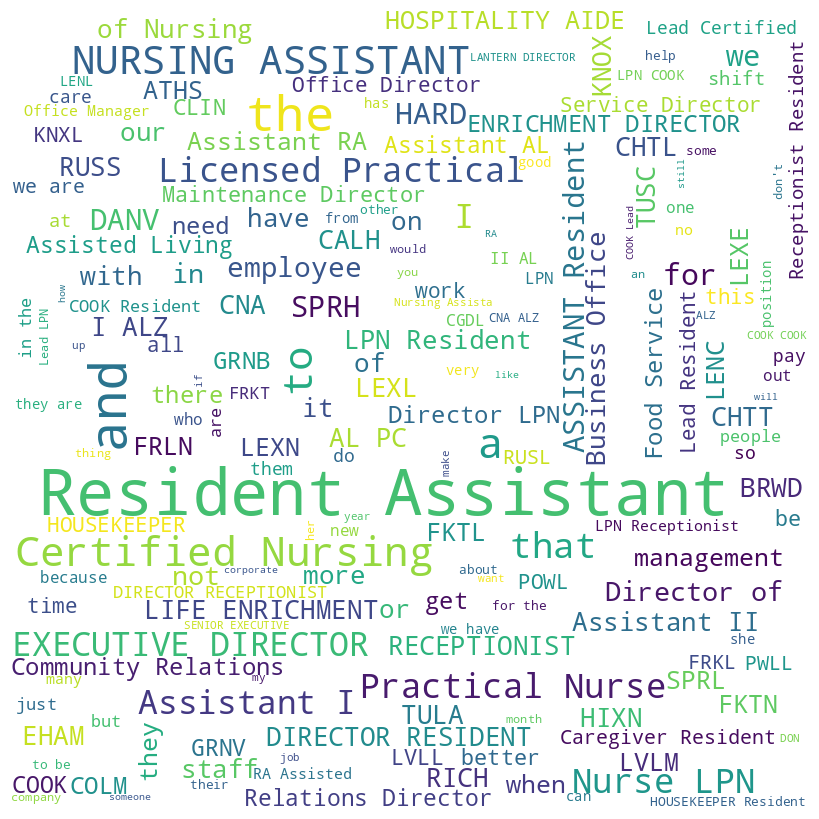

In [ ]:
!pip install wordcloud matplotlib


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

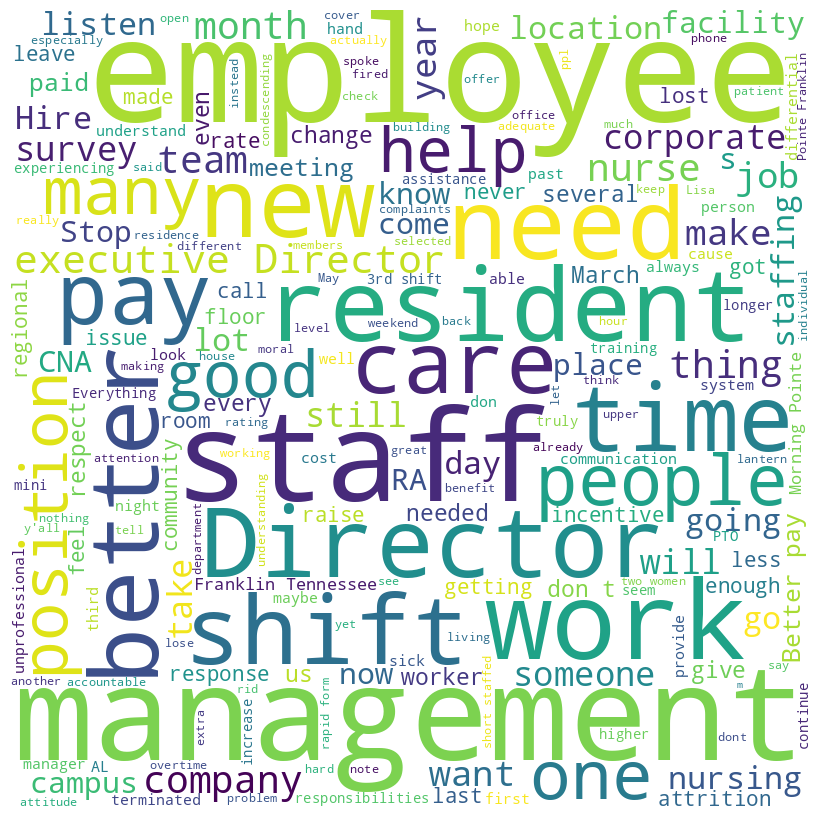

In [ ]:
from wordcloud import STOPWORDS

custom_stopwords = set(STOPWORDS).union({'the', 'and', 'to', 'of', 'in', 'for', 'on', 'with', 'as', 'by', 'an', 'be', 'this', 'that', 'at', 'it','nan'})

from wordcloud import WordCloud
import matplotlib.pyplot as plt


combined_text = ' '.join(word_cloud_df['Q2 - What can we do better?'].dropna().astype(str))

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = custom_stopwords,
                min_font_size = 10).generate(combined_text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
filename = "wordcloud_image.png"
wordcloud.to_file(filename)
files.download(filename)
plt.show()



In [ ]:
!pip install textblob
from textblob import TextBlob

word_cloud_df['sentiment'] = word_cloud_df['Q2 - What can we do better?'].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)

word_cloud_df['sentiment_label'] = word_cloud_df['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))


<ipython-input-27-6df345248541>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  word_cloud_df['sentiment'] = word_cloud_df['Q2 - What can we do better?'].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)
<ipython-input-27-6df345248541>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  word_cloud_df['sentiment_label'] = word_cloud_df['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))


In [ ]:
word_cloud_df['Q2 - What can we do better?'] = word_cloud_df['Q2 - What can we do better?'].astype(str)
grouped_feedback = word_cloud_df.groupby('sentiment_label')['Q2 - What can we do better?'].apply(' '.join).reset_index()


<ipython-input-29-bf83cf7a377e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  word_cloud_df['Q2 - What can we do better?'] = word_cloud_df['Q2 - What can we do better?'].astype(str)



Top words for negative feedback:


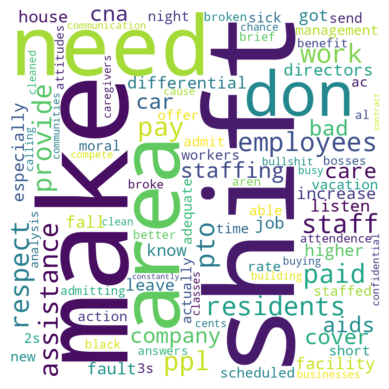


Top words for neutral feedback:


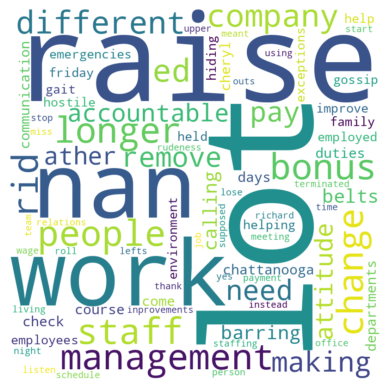


Top words for positive feedback:


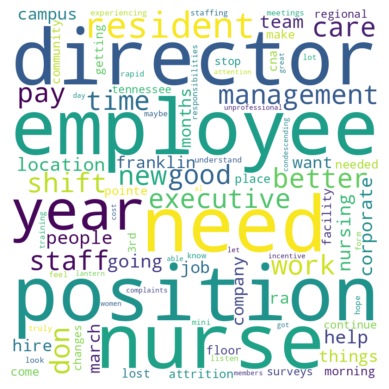

In [ ]:
!pip install scikit-learn wordcloud matplotlib

# from sklearn.feature_extraction.text import TfidfVectorizer
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt

# def generate_word_cloud(text):
#     wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=100).generate(text)
#     plt.imshow(wordcloud, interpolation="bilinear")
#     plt.axis('off')
#     plt.show()

# vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

# for index, row in grouped_feedback.iterrows():
#     tfidf_scores = vectorizer.fit_transform([row['Q2 - What can we do better?']])
#     sorted_items = sorted(zip(vectorizer.get_feature_names_out(), tfidf_scores.toarray().flatten()), key=lambda x: x[1], reverse=True)
#     top_words = [word for word, score in sorted_items[:100]]
#     print(f"\nTop words for {row['sentiment_label']} feedback:")
#     generate_word_cloud(' '.join(top_words))



Top words for negative feedback:


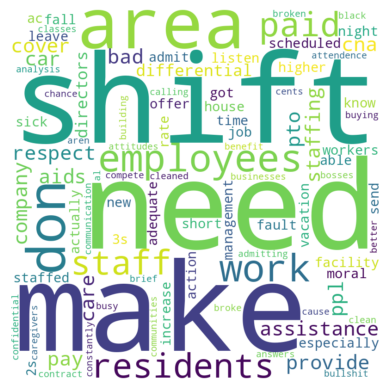

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Word cloud saved as negative_feedback.png and prompted for download.

Top words for neutral feedback:


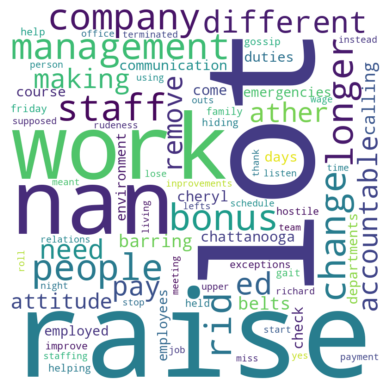

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Word cloud saved as neutral_feedback.png and prompted for download.

Top words for positive feedback:


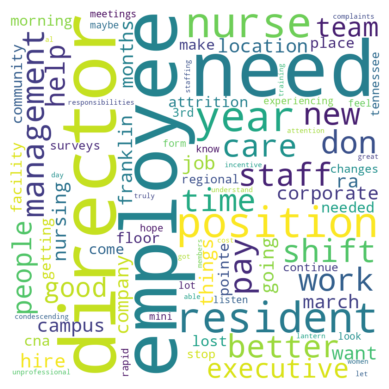

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Word cloud saved as positive_feedback.png and prompted for download.


In [ ]:
def generate_word_cloud(text, sentiment_label):
    wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=100).generate(text)

    # Save to file
    filename = f"{sentiment_label}_feedback.png"
    wordcloud.to_file(filename)

    # Display the word cloud
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

    # Download the file to local drive
    files.download(filename)
    print(f"Word cloud saved as {filename} and prompted for download.")

for index, row in grouped_feedback.iterrows():
    tfidf_scores = vectorizer.fit_transform([row['Q2 - What can we do better?']])
    sorted_items = sorted(zip(vectorizer.get_feature_names_out(), tfidf_scores.toarray().flatten()), key=lambda x: x[1], reverse=True)
    top_words = [word for word, score in sorted_items[:100]]
    print(f"\nTop words for {row['sentiment_label']} feedback:")
    generate_word_cloud(' '.join(top_words), row['sentiment_label'])
